<a href="https://colab.research.google.com/github/nataliarestrada/IPDI-Estrada/blob/main/PDI_TP02_Estrada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabajo Practico N°2 - Aritmetica de Pixeles
Asignatura: **Introducción al Procesamiento Digital de Imágenes (PDI)**

Alumno: **Natalia R. Estrada** - email: nataliarominaestrada@gmail.com

La actividad propuesta debe permitir seleccionar dos imágenes y con estas poder acceder a un menú que permita realizar las siguientes operaciones entre estas:

En espacio RGB:
* Sumas y restas: clampeada y promediada

Es espacio YIQ:
* Sumas y Restas: clampeada, promediada, if-ligther, if-darker

El resultado de estas se debe guardar como una nueva imagen.

####Desarrollo
Importamos las librerias necesarias

In [1]:
import os
import numpy as np
import imageio as io
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

Funciones necesarias para realizar las operaciones

In [2]:
#Función para convertir una imagen del espacio RGB al YIQ
def rgb_to_yiq(RGB):
    '''
    input: matriz de la imagen en formato RGB normalizada
    output: matriz de la imagen en formato YIQ
    '''
    rgb2yiq_matrix = np.array([[0.299,0.587,0.114],[0.595716,-0.274453,-0.321263],[0.211456,-0.522591,0.311135]])
    #print("Matriz de conversion RGB a YIQ:")
    #print(rgb2yiq_matrix)

    #Se normalizan los valores de RGB entre 0.0 y 1.0 (ya estan normalizados al momento de leer la imagen)
    #RGB = RGB/255 

    Y = rgb2yiq_matrix[0][0] * RGB[:,:,0] + rgb2yiq_matrix[0][1] * RGB[:,:,1] + rgb2yiq_matrix[0][2] * RGB[:,:,2]
    I = rgb2yiq_matrix[1][0] * RGB[:,:,0] + rgb2yiq_matrix[1][1] * RGB[:,:,1] + rgb2yiq_matrix[1][2] * RGB[:,:,2]
    Q = rgb2yiq_matrix[2][0] * RGB[:,:,0] + rgb2yiq_matrix[2][1] * RGB[:,:,1] + rgb2yiq_matrix[2][2] * RGB[:,:,2]

    Y = np.clip(Y, 0, 1)
    I = np.clip(I, -0.5957, 0.5957)
    Q = np.clip(Q, -0.5226, 0.5226)
    
    YIQ = np.dstack((Y,I,Q))
    
    return YIQ

#Función para convertir una imagen del espacio YIQ al RGB 
def yiq_to_rgb(YIQ):
    '''
    input: matriz de la imagen en formato YIQ 
    output: matriz de la imagen en formato RGB (en bytes)
    '''
    yiq2rgb_matrix = np.array([[1,0.9663,0.6210],[1,-0.2721,-0.6474],[1,-1.1070,1.7046]])
    #print("Matriz de conversion YIQ a RGB:")
    #print(yiq2rgb_matrix)

    R = yiq2rgb_matrix[0][0] * YIQ[:,:,0] + yiq2rgb_matrix[0][1] * YIQ[:,:,1] + yiq2rgb_matrix[0][2] * YIQ[:,:,2]
    G = yiq2rgb_matrix[1][0] * YIQ[:,:,0] + yiq2rgb_matrix[1][1] * YIQ[:,:,1] + yiq2rgb_matrix[1][2] * YIQ[:,:,2]
    B = yiq2rgb_matrix[2][0] * YIQ[:,:,0] + yiq2rgb_matrix[2][1] * YIQ[:,:,1] + yiq2rgb_matrix[2][2] * YIQ[:,:,2]

    #Se controla que no haya pixeles con valores menores a 0 y mayores a 1 (Dadas las multiplicaciones y sumas realizadas,
    #puede ocurrir que un valor exceda un poco el límite de 255 o sea ligeramente menor a 0 ocasionando errores en la visualización)
    R = np.clip(R, 0, 1)
    G = np.clip(G, 0, 1)
    B = np.clip(B, 0, 1)

    #Se convierten los valores a byte (valores enteros de 0 a 255)
    R = (R*255).astype(int)
    G = (G*255).astype(int)
    B = (B*255).astype(int)    
    
    RGB = np.dstack((R,G,B))
    
    return RGB  

#Función para separar los canales R, G y B de una imagen
def split_RGB(image):
  '''
  input: image=arreglo numpy obtenido luego de leer una imagen
  output: R,G,B=matrices numpy de cada canal de la imagen
  '''
  R = image[:,:,0]
  G = image[:,:,1]
  B = image[:,:,2]
  return np.asarray(R), np.asarray(G), np.asarray(B)

#Función para implementar la suma y resta clampeada de dos imágenes en el espacio RGB
def rgb_clamp(image1, image2,operacion):
  #Separamos los canales de ambas imágenes
  R1, G1, B1 = split_RGB(image1)
  R2, G2, B2 = split_RGB(image2)

  if operacion=='suma':
    R_new = R1 + R2
    R_new = np.clip(R_new, 0, 1)
    G_new = G1 + G2
    G_new = np.clip(G_new, 0, 1)
    B_new = B1 + B2
    B_new = np.clip(B_new, 0, 1)

  if operacion=='resta':
    R_new = R1 - R2
    R_new = np.clip(R_new, 0, 1)
    G_new = G1 - G2
    G_new = np.clip(G_new, 0, 1)
    B_new = B1 - B2
    B_new = np.clip(B_new, 0, 1)

  #Se convierten los valores a byte (valores enteros de 0 a 255)
  R_new = (R_new*255).astype(int)
  G_new = (G_new*255).astype(int)
  B_new = (B_new*255).astype(int)

  rgb_clampped = np.dstack((R_new,G_new,B_new))
  return rgb_clampped

#Función para implementar la suma y resta promediada de dos imágenes en el espacio RGB
def rgb_prom(image1, image2,operacion):
  #Separamos los canales de ambas imágenes
  R1, G1, B1 = split_RGB(image1)
  R2, G2, B2 = split_RGB(image2)

  if operacion=='suma':
    R_new = (R1 + R2)/2
    R_new = np.clip(R_new, 0, 1)
    G_new = (G1 + G2)/2
    G_new = np.clip(G_new, 0, 1)
    B_new = (B1 + B2)/2
    B_new = np.clip(B_new, 0, 1)

  if operacion=='resta':
    R_new = (R1 - R2)/2
    R_new = np.clip(R_new, 0, 1)
    G_new = (G1 - G2)/2
    G_new = np.clip(G_new, 0, 1)
    B_new = (B1 - B2)/2
    B_new = np.clip(B_new, 0, 1)

  #Se convierten los valores a byte (valores enteros de 0 a 255)
  R_new = (R_new*255).astype(int)
  G_new = (G_new*255).astype(int)
  B_new = (B_new*255).astype(int)

  rgb_prom = np.dstack((R_new,G_new,B_new))
  return rgb_prom

#Función para implementar la suma y resta clampeada de dos imágenes en el espacio YIQ
def yiq_clamp(image1, image2, operacion):

  YIQ1 = rgb_to_yiq(image1)
  YIQ2 = rgb_to_yiq(image2)
  #Separamos los canales de ambas imágenes
  Y1, I1, Q1 = YIQ1[:,:,0], YIQ1[:,:,1], YIQ1[:,:,2]
  Y2, I2, Q2 = YIQ2[:,:,0], YIQ2[:,:,1], YIQ2[:,:,2]

  if operacion=='suma':
    Y_new = Y1 + Y2
    Y_new = np.clip(Y_new, 0, 1)
    I_new = (Y1*I1 + Y2*I2)/(Y1+Y2)
    I_new = np.clip(I_new, -0.5957, 0.5957)
    Q_new = (Y1*Q1 + Y2*Q2)/(Y1+Y2) 
    Q_new = np.clip(Q_new, -0.5226, 0.5226)

  if operacion=='resta':
    Y_new = Y1 - Y2
    Y_new = np.clip(Y_new, 0, 1)
    I_new = (Y1*I1 - Y2*I2)/(Y1+Y2)
    I_new = np.clip(I_new, -0.5957, 0.5957)
    Q_new = (Y1*Q1 - Y2*Q2)/(Y1+Y2) 
    Q_new = np.clip(Q_new, -0.5226, 0.5226)

  yiq_clampped = np.dstack((Y_new, I_new, Q_new))
  return yiq_clampped

#Función para implementar la suma y resta promediada de dos imágenes en el espacio YIQ
def yiq_prom(image1, image2, operacion):

  YIQ1 = rgb_to_yiq(image1)
  YIQ2 = rgb_to_yiq(image2)
  #Separamos los canales de ambas imágenes
  Y1, I1, Q1 = YIQ1[:,:,0], YIQ1[:,:,1], YIQ1[:,:,2]
  Y2, I2, Q2 = YIQ2[:,:,0], YIQ2[:,:,1], YIQ2[:,:,2]

  if operacion=='suma':
    Y_new = (Y1 + Y2)/2
    Y_new = np.clip(Y_new, 0, 1)
    I_new = (Y1*I1 + Y2*I2)/(Y1+Y2)
    I_new = np.clip(I_new, -0.5957, 0.5957)
    Q_new = ((Y1*Q1 + Y2*Q2)/(Y1+Y2))
    Q_new = np.clip(Q_new, -0.5226, 0.5226)

  if operacion=='resta':
    Y_new = (Y1 - Y2)/2
    Y_new = np.clip(Y_new, 0, 1)
    I_new = (Y1*I1 - Y2*I2)/(Y1+Y2)
    I_new = np.clip(I_new, -0.5957, 0.5957)
    Q_new = (Y1*Q1 - Y2*Q2)/(Y1+Y2)
    Q_new = np.clip(Q_new, -0.5226, 0.5226)

  yiq_prom = np.dstack((Y_new, I_new, Q_new))
  return yiq_prom

#Función para implementar if-lighter en el espacio YIQ
def yiq_if_ligther (image1, image2):

  YIQ1 = rgb_to_yiq(image1)
  YIQ2 = rgb_to_yiq(image2)

  #Separamos los canales de ambas imágenes
  Y1, I1, Q1 = YIQ1[:,:,0], YIQ1[:,:,1], YIQ1[:,:,2]
  Y2, I2, Q2 = YIQ2[:,:,0], YIQ2[:,:,1], YIQ2[:,:,2]

  #Creo 3 arreglos de ceros de las mismas dimensiones que las imagenes originales
  Y_new = np.zeros_like(Y1)
  I_new = np.zeros_like(I1)
  Q_new = np.zeros_like(Q1)

  for i in range(len(Y1)):
    for j in range(len(Y1[0])):
      if Y1[i,j] >= Y2[i,j]:
        Y_new[i,j] = Y1[i,j]
        I_new[i,j] = I1[i,j]
        Q_new[i,j]= Q1[i,j]
      else:
        Y_new[i,j] = Y2[i,j]
        I_new[i,j] = I2[i,j]
        Q_new[i,j] = Q2[i,j]

  
  Y_new = np.clip(Y_new, 0, 1)
  I_new = np.clip(I_new, -0.5957, 0.5957)
  Q_new = np.clip(Q_new, -0.5226, 0.5226)
  yiq_lighter = np.dstack((Y_new, I_new, Q_new))

  return yiq_lighter

#Función para implementar la suma if-darker en el espacio YIQ
def yiq_if_darker (image1, image2):

  YIQ1 = rgb_to_yiq(image1)
  YIQ2 = rgb_to_yiq(image2)

  #Separamos los canales de ambas imágenes
  Y1, I1, Q1 = YIQ1[:,:,0], YIQ1[:,:,1], YIQ1[:,:,2]
  Y2, I2, Q2 = YIQ2[:,:,0], YIQ2[:,:,1], YIQ2[:,:,2]

  Y_new = np.zeros_like(Y1)
  I_new = np.zeros_like(I1)
  Q_new = np.zeros_like(Q1)

  for i in range(len(Y1)):
    for j in range(len(Y1[0])):
      if Y1[i,j] <= Y2[i,j]:
        Y_new[i,j] = Y1[i,j]
        I_new[i,j] = I1[i,j]
        Q_new[i,j]= Q1[i,j]
      else:
        Y_new[i,j] = Y2[i,j]
        I_new[i,j] = I2[i,j]
        Q_new[i,j] = Q2[i,j]
  
  Y_new = np.clip(Y_new, 0, 1)
  I_new = np.clip(I_new, -0.5957, 0.5957)
  Q_new = np.clip(Q_new, -0.5226, 0.5226)
  yiq_darker = np.dstack((Y_new, I_new, Q_new))

  return yiq_darker

#Funcion para redimancionar imagenes-----------------------------------------------------------------
def igualar_imagenes(url1,url2):
  #Leo las imágenes
  img1 = io.imread(url1)
  img2 = io.imread(url2)

  #Normalizo
  img1=img1/255
  img2=img2/255

  #Obtengo dimensiones de las imágenes
  dim1 = img1.shape
  dim2 = img2.shape

  #Igualo las imagenes modificadas a las originales para su posterior recorte
  img1mod = img1
  img2mod = img2

  #Observo los anchos y altos para determinar cuales son los menores y aplicar los
  #recortes adecuados
  if (dim1[0] != dim2[0]) or (dim1[1] != dim2[1]):
      if (dim1[0] >= dim2[0]) and (dim1[1] >= dim2[1]):
          #filas de 1 mayor que 2 y columnas de 1 mayor que 2
          img1mod = img1[0:dim2[0],0:dim2[1]]
          img2mod = img2

      elif (dim1[0] >= dim2[0]) and (dim1[1] <= dim2[1]):
          #filas de 1 mayor que 2 y columnas de 1 menor que 2
          img1mod = img1[0:dim2[0],:]
          img2mod = img2[:,0:dim1[1]]

      elif (dim1[0] <= dim2[0]) and (dim1[1] >= dim2[1]):
          #filas de 1 menor que 2 y columnas de 1 mayor que 2
          img1mod = img1[:,0:dim2[1]]
          img2mod = img2[0:dim1[0],:]

      elif (dim1[0] <= dim2[0]) and (dim1[1] <= dim2[1]):
          #filas de 1 menor que 2 y columnas de 1 menor que 2
          img1mod = img1
          img2mod = img2[0:dim1[0],0:dim1[1]]  

  return img1mod, img2mod

#Funcion para crear un botón de guardado
def save_button(image,full_path):
  '''
  input: image=arreglo numpy obtenido luego de leer una imagen
         full_path=ruta completa de guardado (incluido nombre y extensión)
  '''
  #Función para guardar una imagen
  def save_image(image,full_path):
    image = np.uint8(image)
    io.imsave(full_path,image)
 
  my_button = widgets.Button(description='GUARDAR IMAGEN')
  out = widgets.Output()

  def on_button_clicked(b):
     with out:
      #Que sucede al presionar el boton
      save_image(image,full_path)      
    
  my_button.on_click(on_button_clicked)
  display(my_button,out)

##Bloque principal del programa.

1. Ingresamos las url de las imagenes a las cuales queremos aplicar las operaciones

> *Se verifica que las dos imágenes tengan las mismas dimensiones, en caso de que esto no suceda, se recortaran las imágenes al menor ancho y alto para poder realizar las distintas operaciones.*



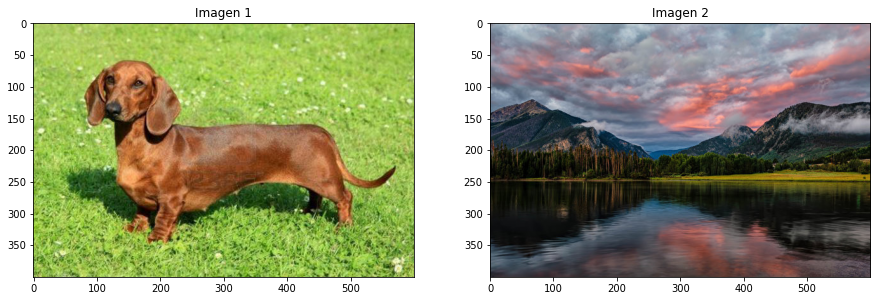

In [7]:
#@title Ingrese las urls de las imagenes a analizar: { run: "auto", vertical-output: true }
imagen1 = "https://pbs.twimg.com/media/BwURyszIYAEtRva.jpg" #@param {type:"string"}

imagen2 = "https://s1.1zoom.me/prev/596/USA_Mountains_Lake_Forests_Sky_Lake_Dillon_Clouds_595131_600x400.jpg" #@param {type:"string"}

#verifico que las imagenes tengan = dim, modifico si es neceseario
img1, img2 = igualar_imagenes(imagen1,imagen2)

#Creo subplot para mostrar las imágenes
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(15,15)

plt.subplot(1,2,1)
plt.imshow(img1)
plt.title("Imagen 1")

plt.subplot(1,2,2)
plt.imshow(img2)
plt.title("Imagen 2")

plt.show()

2. Seeccionar operaciones a realizar

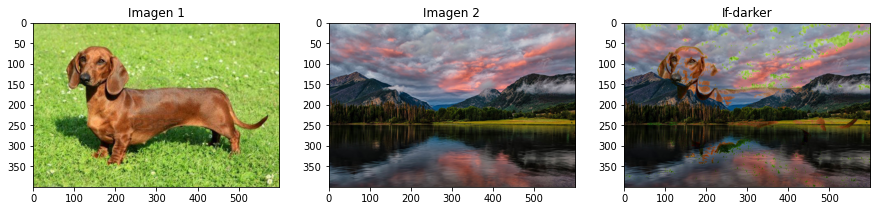

In [6]:
#@title Seleccione la operación a realizar: { run: "auto", vertical-output: true }
Espacio = 'YIQ' #@param ["RGB","YIQ"]
Operación = 'if-darker' #@param ["suma","resta", "if-ligther", "if-darker"]
Tipo = 'promediada' #@param ["clampeada", "promediada"]

if Espacio == 'RGB' and Operación == 'suma' and Tipo == 'clampeada':
  image_mod = rgb_clamp(img1, img2,'suma')
  titulo='Suma Clampeada RGB'

elif Espacio == 'RGB' and Operación == 'resta' and Tipo == 'clampeada':
  image_mod = rgb_clamp(img1, img2,'resta')
  titulo='Resta Clampeada RGB'

elif Espacio == 'RGB' and Operación == 'suma' and Tipo == 'promediada':
  image_mod = rgb_prom(img1, img2,'suma')
  titulo='Suma Promediada RGB'

elif Espacio == 'RGB' and Operación == 'resta' and Tipo == 'promediada':
  image_mod = rgb_prom(img1, img2,'resta')
  titulo='Resta Promediada RGB'

elif Espacio == 'YIQ' and Operación == 'suma' and Tipo == 'clampeada':
  yiq_image_mod = yiq_clamp(img1, img2,'suma')
  image_mod = yiq_to_rgb(yiq_image_mod) #convierto a RGB para mostrar la imagen (la imagen no se modifica dado que son operaciones lineales)
  titulo='Suma Clampeada YIQ'

elif Espacio == 'YIQ' and Operación == 'resta' and Tipo == 'clampeada':
  yiq_image_mod = yiq_clamp(img1, img2,'resta')
  image_mod = yiq_to_rgb(yiq_image_mod) #convierto a RGB para mostrar la imagen (la imagen no se modifica dado que son operaciones lineales)
  titulo='Resta Clampeada YIQ'

elif Espacio == 'YIQ' and Operación == 'suma' and Tipo == 'promediada':
  yiq_image_mod = yiq_prom(img1, img2,'suma')
  image_mod = yiq_to_rgb(yiq_image_mod) #convierto a RGB para mostrar la imagen (la imagen no se modifica dado que son operaciones lineales)
  titulo='Suma Promediada YIQ'

elif Espacio == 'YIQ' and Operación == 'resta' and Tipo == 'promediada':
  yiq_image_mod = yiq_prom(img1, img2,'resta')
  image_mod = yiq_to_rgb(yiq_image_mod) #convierto a RGB para mostrar la imagen (la imagen no se modifica dado que son operaciones lineales)
  titulo='Resta Promediada YIQ'

elif Espacio == 'YIQ' and Operación == 'if-ligther':
  yiq_image_mod = yiq_if_ligther(img1, img2)
  image_mod = yiq_to_rgb(yiq_image_mod) #convierto a RGB para mostrar la imagen (la imagen no se modifica dado que son operaciones lineales)
  titulo='If-ligther'

elif Espacio == 'YIQ' and Operación == 'if-darker':
  yiq_image_mod = yiq_if_darker(img1, img2)
  image_mod = yiq_to_rgb(yiq_image_mod) #convierto a RGB para mostrar la imagen (la imagen no se modifica dado que son operaciones lineales)
  titulo='If-darker'

else:
  print("Función aritmética no disponible")


fig, axs = plt.subplots(1, 3)
fig.set_size_inches(15,15)

plt.subplot(1,3,1)
plt.imshow(img1)
plt.title("Imagen 1")

plt.subplot(1,3,2)
plt.imshow(img2)
plt.title("Imagen 2")

plt.subplot(1,3,3)
plt.imshow(image_mod)
plt.title(titulo)

plt.show()


3. Guardar imagen

> Por defecto `path = "/content/"`guardara la imagen en la pestaña de **Archivos** que se accede desde la barra lateral de Google Colab 

In [5]:
#@title Guardar imagen modificada: { run: "auto", vertical-output: true }
#@markdown Path para guardar la imagen modificada:
path = '/content/' #@param {type:"string"}
#@markdown Nombre para guardar la imagen modificada:
name = 'if-daker' #@param {type:"string"}
#@markdown Formato para guardar la imagen modificada 
format = '.png' #@param [".jpg",".png"]
#@markdown Para guardar la imagen modificada presione el botón GUARDAR IMAGEN
full_path = os.path.join(path,name+format)

save_button(image_mod,full_path)

Button(description='GUARDAR IMAGEN', style=ButtonStyle())

Output()